In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t
import plotly.express as px


# About the project and Problem Statement : 

## About Yulu

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.


### `The company wants to know:`

- Which variables are significant in predicting the demand for shared electric cycles in the Indian market?
- How well those variables describe the electric cycle demands

#### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)

- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.


- weather:

    1. : Clear, Few clouds, partly cloudy, partly cloudy
    2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    

- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [190]:
df = pd.read_csv("bike_sharing.txt")

In [191]:
data = df.copy()

##### # shape of the data : 

In [192]:

data.shape

(10886, 12)

In [193]:
data.head(10)

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1   9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1   9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1   9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1   9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1   9.84  14.395   
5  2011-01-01 05:00:00       1        0           0        2   9.84  12.880   
6  2011-01-01 06:00:00       1        0           0        1   9.02  13.635   
7  2011-01-01 07:00:00       1        0           0        1   8.20  12.880   
8  2011-01-01 08:00:00       1        0           0        1   9.84  14.395   
9  2011-01-01 09:00:00       1        0           0        1  13.12  17.425   

   humidity  windspeed  casual  registered  count  
0        81     0.0000       3          13     16  
1        80     0.0000       8          32     40  
2        80     0.0000       5          27     32  
3        75     0.0000       3          10     13  
4        75     0.0000       0           1      1  
5        75     6.0032       0           1      1  
6        80     0.0000       2           0      2  
7        86     0.0000       1           2      3  
8        75     0.0000       1           7      8  
9        76     0.0000       8           6     14

##### 10,886 records of bike rented hourly bases .

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [195]:
data.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [196]:
# no null values detected 

In [197]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

    holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)



    workingday: except weekend or holiday is 1,
    offday : 0.
    
    
    
    #### weather : 

                                                                                            weather changed to 
    1. : Clear, Few clouds, partly cloudy, partly cloudy                                            (clear)
    2. : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist                               (cloudy)
    3. : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds    (little rain)
    4. : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog                                 (heavey rain) 

In [198]:
# unique values per columns: 

In [199]:
data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

## `Pre-processing data : `

In [200]:
data["weather"].replace({1:"Clear",
                       2:"Cloudy",
                       3:"Little Rain",
                       4:"Heavy Rain"},inplace=True)
data["season"].replace({1:"Spring",
                       2:"Summer",
                       3:"Fall",
                       4:"Winter"},inplace=True)
data["workingday"].replace({1:"Yes",
                           0:"No"},inplace=True)
data["datetime"] = pd.to_datetime(data["datetime"])
data["holiday"].replace({1:"Yes",
                           0:"No"},inplace=True)
data["day"]=data["datetime"].dt.day_name()
data["date"] = data["datetime"].dt.date
data["hour"] = data["datetime"].dt.hour
data["Month"] = data["datetime"].dt.month
data["Month_name"] = data["datetime"].dt.month_name()
data["year"] = data["datetime"].dt.year

###### Categorising Temperature And Humidity Levels for chi-Square test : 

In [201]:
data["atemp"].describe()

count    10886.000000
mean        23.655084
std          8.474601
min          0.760000
25%         16.665000
50%         24.240000
75%         31.060000
max         45.455000
Name: atemp, dtype: float64

In [204]:
np.linspace(data["atemp"].min(),data["atemp"].max(),5)

array([ 0.76   , 11.93375, 23.1075 , 34.28125, 45.455  ])

In [205]:
def get_temp(temp):
    if temp <= 12:
        return "very low"
    elif temp > 12 and temp < 24:
        return "low"
    elif temp >=24 and temp < 35:
        return "moderate"
    elif temp >= 35 :
        return "high"
        

In [206]:
data["temperature"]  = pd.Series(map(get_temp,data["atemp"]))

In [207]:
np.linspace(data["humidity"].min(),data["humidity"].max(),11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [208]:
def get_humidity(H):
    if 0 <= H <= 10:
        return "10%"
    elif 11 <= H <= 20:
        return "20%"
    elif 21 <= H <= 30:
        return "30%"
    elif 31 <= H <= 40:
        return "40%"
    elif 41 <= H <= 50:
        return "50%"
    elif 51 <= H <= 60:
        return "60%"
    elif 61 <= H <= 70:
        return "70%"
    elif 71 <= H <= 80:
        return "80%"
    elif 81 <= H <= 90:
        return "90%"
    elif 91 <= H <= 100:
        return "100%"
        

In [209]:
data["gethumidity"]  = pd.Series(map(get_humidity,data["humidity"]))

In [210]:
data["windspeed"].describe()

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64

###### wind speed category: http://gyre.umeoce.maine.edu/data/gomoos/buoy/php/variable_description.php?variable=wind_2_speed

In [387]:
def get_windspeed(H):
    if 0 <= H <= 1:
        return "A (0)"
    elif 2 <= H <= 3:
        return "B (2-3)"
    elif 4 <= H <= 7:
        return "C (4-7)"
    elif 8 <= H <= 12:
        return "D (8-12)"
    elif 13 <= H <= 18:
        return "E (13-18)"
    elif 19 <= H <= 24:
        return "F (19-24)"
    elif 25 <= H <= 31:
        return "G (25-31)"
    elif 32 <= H <= 38:
        return "H (32-38)"
    elif 39 <= H <= 46:
        return "I (39-46)"
    elif 47 <= H <= 54:
        return "J (47-54)"
    elif 55 <= H <= 60:
        return "K (>54)"
        

In [388]:
data["windspeed_category"]  = pd.Series(map(get_windspeed,data["windspeed"]))

##### Data information : 

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            10886 non-null  datetime64[ns]
 1   season              10886 non-null  object        
 2   holiday             10886 non-null  object        
 3   workingday          10886 non-null  object        
 4   weather             10886 non-null  object        
 5   temp                10886 non-null  float64       
 6   atemp               10886 non-null  float64       
 7   humidity            10886 non-null  int64         
 8   windspeed           10886 non-null  float64       
 9   casual              10886 non-null  int64         
 10  registered          10886 non-null  int64         
 11  count               10886 non-null  int64         
 12  day                 10886 non-null  object        
 13  date                10886 non-null  object    

### statistical summery about the data :

In [371]:
data.describe(include="object")

season holiday workingday weather       day        date Month_name  \
count    10886   10886      10886   10886     10886       10886      10886   
unique       4       2          2       4         7         456         12   
top     Winter      No        Yes   Clear  Saturday  2011-01-01        May   
freq      2734   10575       7412    7192      1584          24        912   

       temperature gethumidity   windspeed_category  
count        10886       10886                 8718  
unique           4          10                   10  
top       moderate         70%  Gentle_Breeze(8-12)  
freq          4767        1845                 2177

In [215]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'date', 'hour', 'Month', 'Month_name', 'year', 'temperature',
       'gethumidity', 'windspeed_category'],
      dtype='object')

In [216]:
correlations = data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr().unstack()

##### Correlation Matrix : 

In [217]:
data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

temp     atemp  humidity  windspeed    casual  registered  \
temp        1.000000  0.984948 -0.064949  -0.017852  0.467097    0.318571   
atemp       0.984948  1.000000 -0.043536  -0.057473  0.462067    0.314635   
humidity   -0.064949 -0.043536  1.000000  -0.318607 -0.348187   -0.265458   
windspeed  -0.017852 -0.057473 -0.318607   1.000000  0.092276    0.091052   
casual      0.467097  0.462067 -0.348187   0.092276  1.000000    0.497250   
registered  0.318571  0.314635 -0.265458   0.091052  0.497250    1.000000   
count       0.394454  0.389784 -0.317371   0.101369  0.690414    0.970948   

               count  
temp        0.394454  
atemp       0.389784  
humidity   -0.317371  
windspeed   0.101369  
casual      0.690414  
registered  0.970948  
count       1.000000

### Heatmap (correlation between features)

<AxesSubplot:>

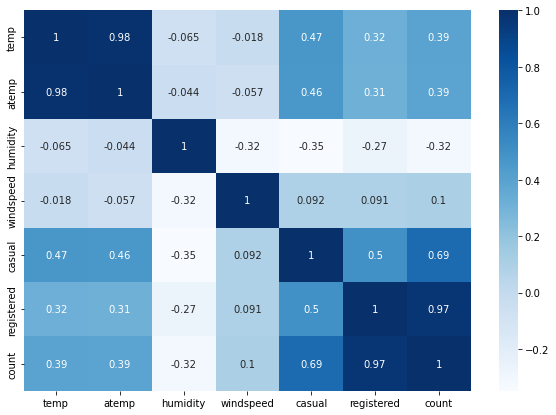

In [218]:
plt.figure(figsize=(10,7))
sns.heatmap(data[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr(),annot=True,cmap = "Blues")

###### features having Correlation coefficient > 0.5 : 

In [219]:
correlations[(correlations>0.5)&(correlations<1) ]

temp        atemp         0.984948
atemp       temp          0.984948
casual      count         0.690414
registered  count         0.970948
count       casual        0.690414
            registered    0.970948
dtype: float64

#### Pre-processed Data Sample  : 

In [220]:
data.sample(10)

datetime  season holiday workingday      weather   temp  \
8804 2012-08-09 05:00:00    Fall      No        Yes       Cloudy  27.06   
540  2011-02-05 16:00:00  Spring      No         No  Little Rain   9.02   
299  2011-01-13 22:00:00  Spring      No        Yes        Clear   5.74   
3825 2011-09-10 09:00:00    Fall      No         No        Clear  26.24   
3754 2011-09-07 09:00:00    Fall      No        Yes  Little Rain  24.60   
1527 2011-04-09 12:00:00  Summer      No         No       Cloudy  14.76   
5586 2012-01-07 21:00:00  Spring      No         No        Clear  18.04   
7703 2012-06-01 08:00:00  Summer      No        Yes       Cloudy  26.24   
5929 2012-02-03 06:00:00  Spring      No        Yes        Clear   9.84   
373  2011-01-17 01:00:00  Spring     Yes         No       Cloudy   8.20   

       atemp  humidity  windspeed  casual  ...  count        day        date  \
8804  29.545        94     0.0000       4  ...     41   Thursday  2012-08-09   
540   11.365       100     8.9981       8  ...     71   Saturday  2011-02-05   
299    6.060        46    22.0028       0  ...     30   Thursday  2011-01-13   
3825  29.545        78    19.9995      39  ...    207   Saturday  2011-09-10   
3754  27.275        88     8.9981      14  ...    190  Wednesday  2011-09-07   
1527  17.425        81     8.9981      79  ...    202   Saturday  2011-04-09   
5586  21.970        44    15.0013      22  ...    140   Saturday  2012-01-07   
7703  28.790        89    12.9980      19  ...    694     Friday  2012-06-01   
5929  12.120        65    11.0014       0  ...     88     Friday  2012-02-03   
373    9.850        44    12.9980       1  ...     16     Monday  2011-01-17   

     hour  Month  Month_name  year  temperature gethumidity  \
8804    5      8      August  2012     moderate        100%   
540    16      2    February  2011     very low        100%   
299    22      1     January  2011     very low         50%   
3825    9      9   September  2011     moderate         80%   
3754    9      9   September  2011     moderate         90%   
1527   12      4       April  2011          low         90%   
5586   21      1     January  2012          low         50%   
7703    8      6        June  2012     moderate         90%   
5929    6      2    February  2012          low         70%   
373     1      1     January  2011     very low         50%   

          windspeed_category  
8804                 Calm(0)  
540      Gentle_Breeze(8-12)  
299      Fresh_Breeze(19-24)  
3825     Fresh_Breeze(19-24)  
3754     Gentle_Breeze(8-12)  
1527     Gentle_Breeze(8-12)  
5586  Moderate Breeze(13-18)  
7703              Strom(>54)  
5929     Gentle_Breeze(8-12)  
373               Strom(>54)  

[10 rows x 21 columns]

about the features : 

    dependent variables  : count / registerd / casual 

    independent variables : workingday / holiday / weather / seasons . 

# number of cycles rented by :  casual users and registered users 

# Casual vs Registered rentals : 

In [221]:
registered_per_hour_median = data.groupby("hour")["registered"].median()
casual_per_hour_median = data.groupby("hour")["casual"].median()

In [222]:
registered_per_hour_median = registered_per_hour_median.reset_index()

In [223]:
casual_per_hour_median = casual_per_hour_median.reset_index()

In [224]:
casual_per_hour_median["hour"]+= 1

In [225]:
registered_per_hour_median["hour"]+= 1

In [226]:
median_count_perHr = registered_per_hour_median.merge(casual_per_hour_median,on="hour")

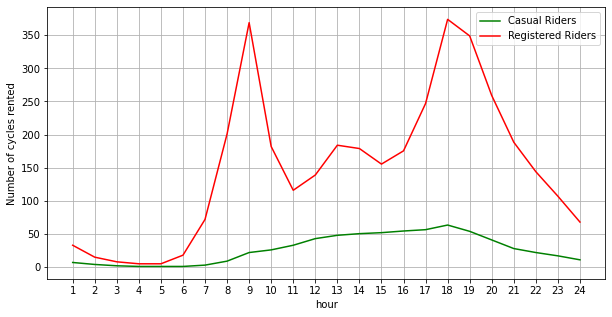

In [227]:
plt.figure(figsize=(10,5))
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["casual"],color="g",legend='auto')
sns.lineplot(x = median_count_perHr["hour"],
             y = median_count_perHr["registered"],color="r",legend='auto')
plt.legend(["Casual Riders","Registered Riders"])
plt.grid()
plt.xticks(np.arange(1,25,1))
plt.ylabel("Number of cycles rented")
plt.show()

    From above linplot : 
    - registered customers seems to be using rental cycles mostly for work-commute purposes. 
    - registered cycle counts seems to be much higher than the casual customers. 

In [231]:
print("Casual Users (in %) :")
(data["casual"].sum()/data["count"].sum())*100

Casual Users (in %) :


18.8031413451893

In [232]:
print("Registered Users (in %) : ")
(data["registered"].sum()/data["count"].sum())*100

Registered Users (in %) : 


81.1968586548107

    81% cycles had been rented by registered riders. 
    19% cycles had been rented by casual riders. 

# Hourly median number of cycles rented during the day : 

In [264]:

fig = px.bar(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,text_auto='.2s',
              labels={
                     "x": "Hours",
                     "y": "Median value of Number of cycles rented",}                     
            )
fig.update_layout(
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 1
    )
)


fig.show()

    - from above bar chart : 
    - shows the median value of number  of cycles were rented during perticular hour of the day.
    
    - Median of number of cycles rented are higher during morning 7 to 9 am to evening 4 to 8pm .
    


# Effect of seasons on number of cycles rented during hours : 

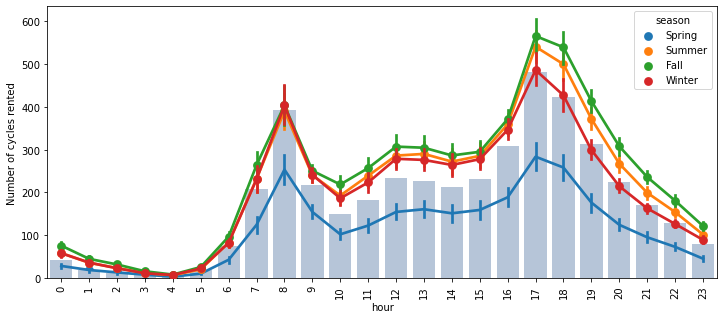

In [270]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["season"],
              ci=95)
plt.xticks(rotation = 90)
plt.ylabel("Number of cycles rented")
plt.show()

    during the morning 7-9am and afternoon 4pm to 7pm , the cycles rent counts is increasing. 
    during the spring season , looks like people prefer less likely to rent the cycle.

##### number of cycles rented during differnet seasons (in %) : 


In [271]:
season_wise_rent_percentage = data.groupby("season")["count"].sum()/np.sum(data["count"])*100

In [272]:
season_wise_rent_percentage

season
Fall      30.720181
Spring    14.984493
Summer    28.208524
Winter    26.086802
Name: count, dtype: float64

Text(0, 0.5, 'Number of cycles rented (in %)')

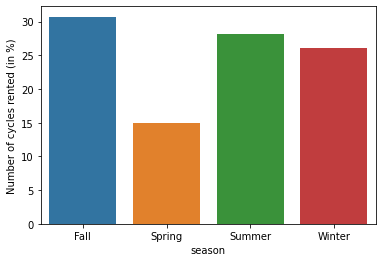

In [273]:
sns.barplot(x= season_wise_rent_percentage.index,
           y = season_wise_rent_percentage)
plt.ylabel("Number of cycles rented (in %)")

# weather effect on cycle rental median counts hourly : 

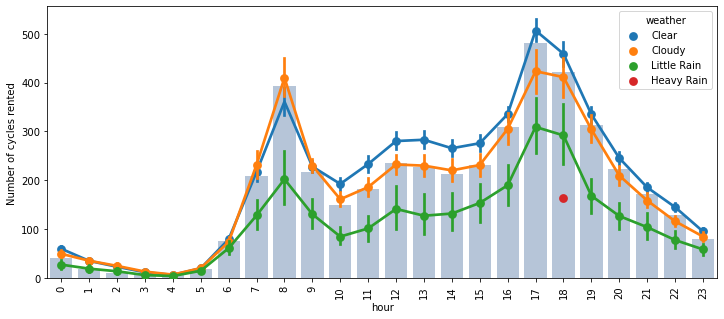

In [48]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["weather"],
              ci=95)
plt.xticks(rotation = 90)
plt.ylabel("Number of cycles rented")
plt.show()

In [49]:
weather_wise_rent_percentage = data.groupby("weather")["count"].sum()/np.sum(data["count"])*100
weather_wise_rent_percentage

weather
Clear          70.778230
Cloudy         24.318669
Heavy Rain      0.007864
Little Rain     4.895237
Name: count, dtype: float64

Text(0, 0.5, 'Number of cycles rented in %')

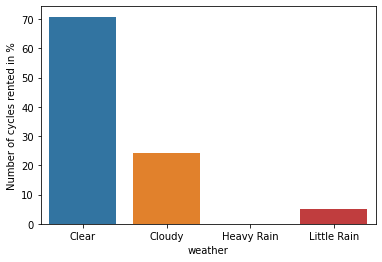

In [50]:
sns.barplot(x= weather_wise_rent_percentage.index,
           y = weather_wise_rent_percentage)
plt.ylabel("Number of cycles rented in %")

    70% of the cycles were rented when it was clear weather. 
    24% when it was cloudy weather . 
    
    during rainy weather , only around 5% of the cycles were rented.

# DISTRIBUTIONS and Comparision of number of cycles rented during working days and off day , across different seasons .

- ### Boxplot - distribution of number of bike rented , during different weather as per workingday or not! 

In [51]:
fig = px.box(data, x="weather", y="count", color="workingday")
fig.show()

     - from above boxplot, we can say , there's no significant activity during heavy rain weather.
     - High activity during clear and cloudy weather. 

- ### Boxplot - distribution of number of bike rented , during different seasons as per workingday or not! 

In [52]:
fig = px.box(data, x="season", y="count", color="workingday")
fig.show()

    - during spring season , number of bike rented were lower than summer and fall. 
    

# overview on distributions  of Numerical Features : 

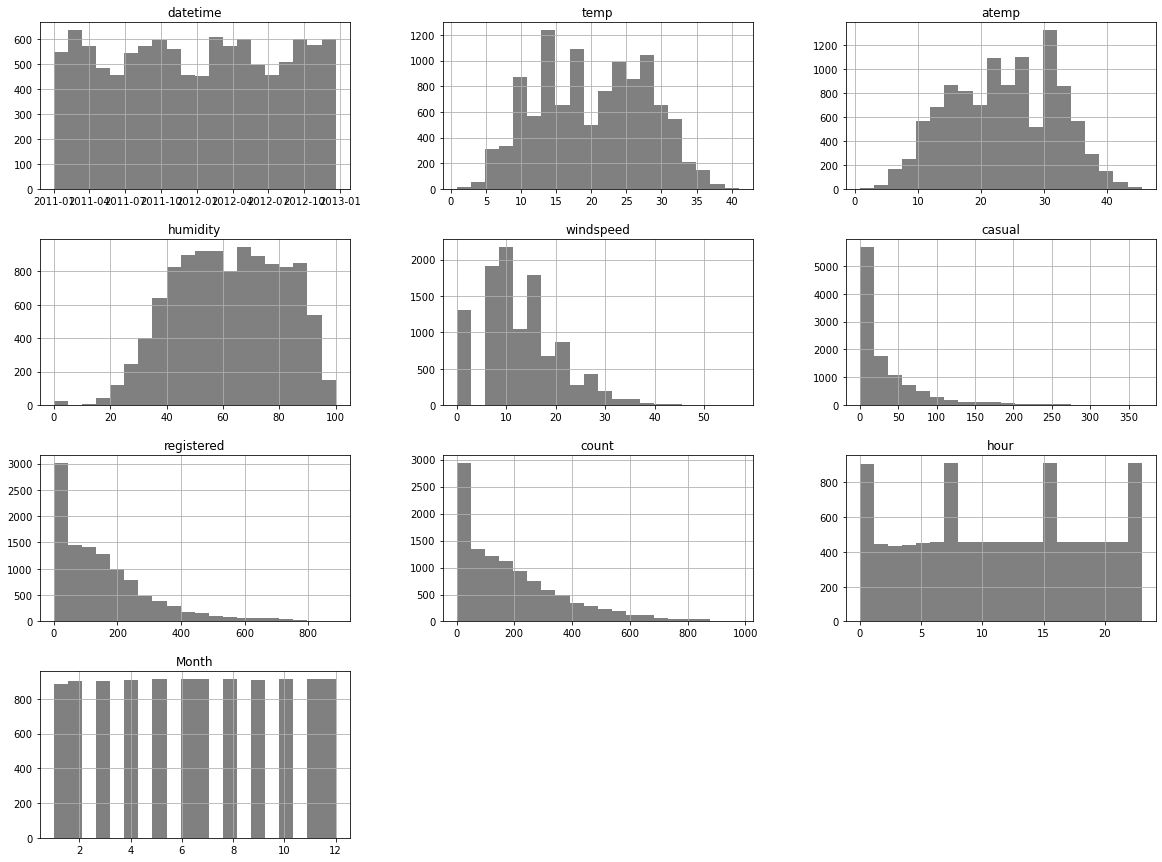

In [53]:

data.hist(bins=20,figsize=(20,15),color='grey')
plt.show()

    From above distribution plots of number of bikes rented , are not normally distributed. 
    - also that there are outliers in the data and overall distributions are heavily right skewed . 
    
    - data need to be tranformed for hypothesis test calculations further.

# Yearly difference in number of bike rental : 

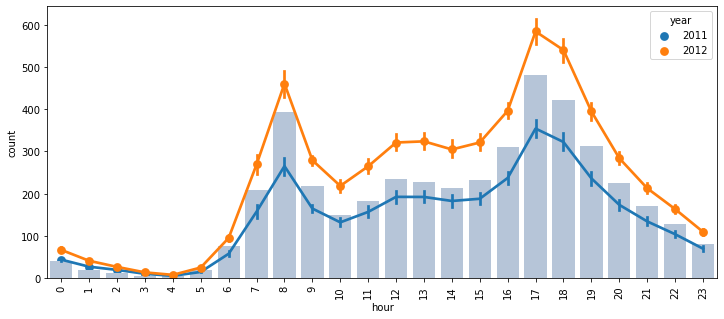

In [300]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["year"],
              ci=95)
plt.xticks(rotation = 90)
plt.show()

    > hourly  average bike rented in year 2011 and 2012 

In [336]:
data[data["year"]==2011]["count"].median()

111.0

In [329]:
data.groupby("year")["count"].median()

year
2011    111.0
2012    199.0
Name: count, dtype: float64

In [330]:
(((199-111)/111))*100

79.27927927927928

    - from 2011  , there's 79.27% hike in hourly median number of bike rental. 

In [309]:
data.groupby("year")["casual"].median()

year
2011    13.0
2012    20.0
Name: casual, dtype: float64

In [310]:
data.groupby("year")["registered"].median()

year
2011     91.0
2012    161.0
Name: registered, dtype: float64

In [328]:
(((161-91)/91))*100

76.92307692307693

     >  in registered customers , 76% hike in hourly median cycle rental from 2011 to 2012. 
     
     > in 2011 , median number of hourly rental were 13 , and in 2012 , its 20.
     -

## Number and cycles rented and temperature correlation : 

In [54]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'date', 'hour', 'Month', 'Month_name', 'temperature',
       'gethumidity', 'windspeed_category'],
      dtype='object')

In [298]:
fig = px.scatter(data, x="count", y="atemp",  color="count", trendline="ols")
fig.show()

    - from scatter plot , there's a positive trend across temperature and number of bikes rented. 
    

- After categorising the temperature as low, verylow, moderate, high : 

In [295]:
fig = px.box(data, x="temperature", y="count", color="workingday")
fig.show()

    from above boxplot : 
    number of bike rented during moderate to high temerature is significantly higher than lower temperature. 

# offday vs working day number of cycles rented trend during a day : 

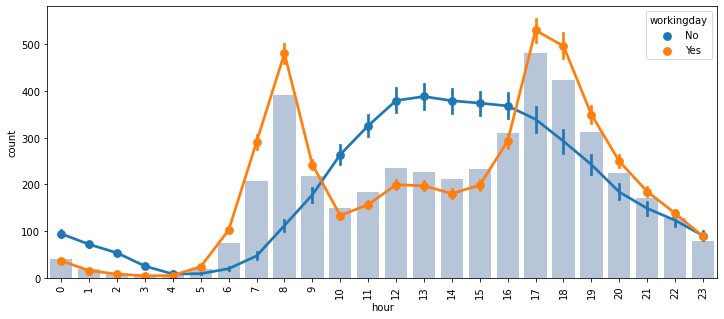

In [299]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightsteelblue")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["workingday"],
              ci=95)
plt.xticks(rotation = 90)
plt.show()

    # trend of number of cycles rented changed as per working day and off-day . trend is opposit. 
    # on off days , number of cycles rented increases during the day time ! which is opposite of during working days.

    # from above plot it looks like, working day count of cycle rented seems to be higher than offday! 
    # lets do a AB test : weather mean of rented cycled on working day and offdays are same or not ! 

##### hourly median  number of cycles rented during

In [340]:
data.groupby("workingday")["count"].median()

workingday
No     128.0
Yes    151.0
Name: count, dtype: float64

##### hourly average  number of cycles rented during

In [341]:
data.groupby("workingday")["count"].mean()

workingday
No     188.506621
Yes    193.011873
Name: count, dtype: float64

##### Boxplot : number of bikes rented during working day and off-day : 

In [342]:
fig = px.box(data, x="workingday", y="count")
fig.show()

     - from above boxplot , 
     - distributions of hourly number of bike rented during working day and off day seems similar . 
     - though there are more outliers in workinday category. 

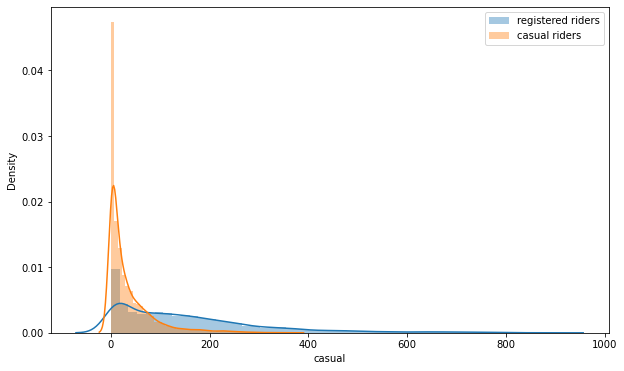

In [343]:
plt.figure(figsize=(10,6))

sns.distplot(data["registered"], label = "registered riders")
sns.distplot(data["casual"], label = "casual riders")
plt.legend()
plt.show()

### testing if mean number of electric cycles rented on workday is equal to on offday ! 

## t-test : 
### If working day and offday has an effect on the number of electric cycles rented.



###### distribution of number of bikes rented as per working day or offday (in percentages )

In [344]:
data.groupby("workingday")["count"].sum()/np.sum(data["count"])*100

workingday
No     31.40156
Yes    68.59844
Name: count, dtype: float64

In [345]:
workingday = data.loc[data["workingday"]=="Yes"]["count"]
offday = data.loc[data["workingday"]=="No"]["count"]

- Establishing Hypothesis :     
    
        H0: average # of cycles rented on workingdays   =   average # of cycles rented on offday 
        Ha: average # of cycles rented on workingdays  !=   average # of cycles rented on offday 

In [346]:
m1 = np.mean(workingday)
n1 = len(workingday)
s1 = np.std(workingday,ddof = 1)

m2 = np.mean(offday)
n2 = len(offday)
s2 = np.std(offday,ddof = 1)


In [347]:
m1,m2,m1-m2

(193.01187263896384, 188.50662061024755, 4.505252028716285)

    calulating Test Statistic : 

In [348]:
T_observed =(m1-m2)/(np.sqrt(((s1**2)/n1)+((s2**2)/n2)))
T_observed

1.236258041822322

    p-Value : 

In [349]:
p_value = 2*(1-stats.t.cdf(T_observed,n1+n2-2))
p_value

<IPython.core.display.Javascript object>

0.2163893399034813

    Extream Critical Value

In [350]:
T_critical = stats.t.ppf(0.975,n1+n2-2)
T_critical

<IPython.core.display.Javascript object>

1.9601819678713073

In [351]:
p_value > 0.05

True

In [352]:
-T_critical <  T_observed < T_critical 

True

    # we failed to reject null Hypothesis 

  mean of number of cycles rented on `working days are equal as the cycles rented on offdays`. 

#  Month and season wise , effect on median and average number of cycles rented .

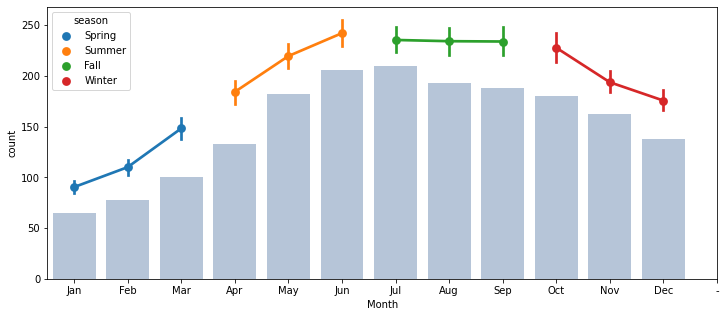

In [354]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("Month")["count"].median(),
           x = data.groupby("Month")["count"].median().index,
           color="lightsteelblue")
sns.pointplot(x = data["Month"],
              y= data["count"],
              hue=data["season"],
              ci=95)

plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec","-"])

plt.show()

In [355]:
# cycle rental counts decreased during winter season and opering spring seaosn . 

## temperature effect on cycle rental

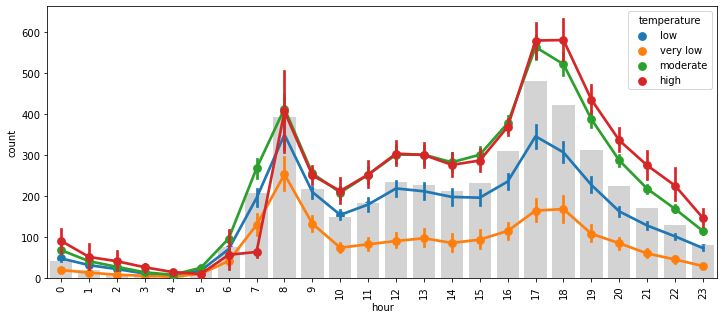

In [356]:
plt.figure(figsize=(12,5))
sns.barplot(y = data.groupby("hour")["count"].median(),
           x = data.groupby("hour")["count"].median().index,
            color="lightgrey")
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["temperature"],
              ci=95)
plt.xticks(rotation = 90)
plt.show()

In [357]:
temperature_wise_rent_percentage = data.groupby("temperature")["count"].sum()/np.sum(data["count"])*100
temperature_wise_rent_percentage

temperature
high        12.487269
low         30.172248
moderate    53.538617
very low     3.801866
Name: count, dtype: float64

# humidity  vs count

In [358]:
fig = px.scatter(data, y="count", x="humidity",  color="weather", trendline="ols")
fig.show()

In [377]:
humidity_wise_rent_percentage = data.groupby("gethumidity")["count"].sum()/np.sum(data["count"])*100
humidity_wise_rent_percentage

gethumidity
10%      0.038696
100%     2.565314
20%      0.635970
30%      5.942528
40%     15.798887
50%     19.659541
60%     18.030512
70%     16.507215
80%     11.268459
90%      9.552879
Name: count, dtype: float64

<AxesSubplot:xlabel='gethumidity', ylabel='count'>

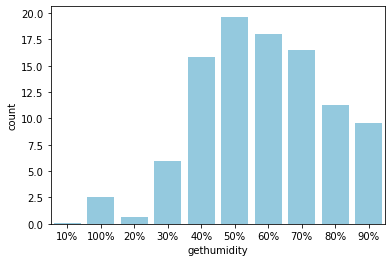

In [378]:
sns.barplot(x= humidity_wise_rent_percentage.index,
           y = humidity_wise_rent_percentage,color="skyblue")

# Windspeed vs count : 

In [389]:
windspeed_wise_rent_percentage = data.groupby("windspeed_category")["count"].sum()/np.sum(data["count"])*100
windspeed_wise_rent_percentage

windspeed_category
A (0)        10.142816
C (4-7)       6.182665
D (8-12)     19.684427
E (13-18)    18.204237
F (19-24)    18.573314
G (25-31)     5.700473
H (32-38)     1.554082
I (39-46)     0.482048
J (47-54)     0.021913
K (>54)       0.025845
Name: count, dtype: float64

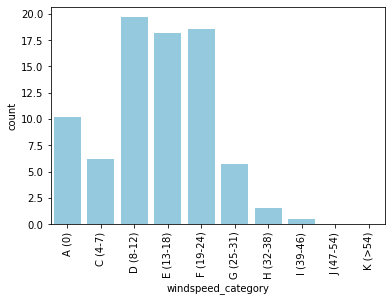

In [390]:
sns.barplot(x= windspeed_wise_rent_percentage.index,
           y = windspeed_wise_rent_percentage,color="skyblue")
plt.xticks(rotation =90)
plt.show()

In [362]:
data.sample(20)

datetime  season holiday workingday      weather   temp  \
1091 2011-03-10 00:00:00  Spring      No        Yes  Little Rain  13.94   
2540 2011-06-13 18:00:00  Summer      No        Yes        Clear  28.70   
5777 2012-01-15 21:00:00  Spring      No         No        Clear   6.56   
4012 2011-09-18 05:00:00    Fall      No         No        Clear  18.04   
747  2011-02-14 12:00:00  Spring      No        Yes        Clear  22.96   
8479 2012-07-14 16:00:00    Fall      No         No       Cloudy  29.52   
7061 2012-04-12 14:00:00  Summer      No        Yes        Clear  20.50   
6389 2012-03-03 11:00:00  Spring      No         No       Cloudy  16.40   
2893 2011-07-09 11:00:00    Fall      No         No        Clear  31.98   
3869 2011-09-12 06:00:00    Fall      No        Yes        Clear  22.96   
7601 2012-05-16 02:00:00  Summer      No        Yes        Clear  22.96   
3834 2011-09-10 18:00:00    Fall      No         No        Clear  29.52   
9093 2012-09-02 06:00:00    Fall      No         No       Cloudy  27.06   
7356 2012-05-05 21:00:00  Summer      No         No       Cloudy  23.78   
4856 2011-11-15 10:00:00  Winter      No        Yes       Cloudy  22.96   
3876 2011-09-12 13:00:00    Fall      No        Yes        Clear  29.52   
6192 2012-02-14 06:00:00  Spring      No        Yes       Cloudy  10.66   
8063 2012-06-16 08:00:00  Summer      No         No        Clear  23.78   
1966 2011-05-08 20:00:00  Summer      No         No        Clear  21.32   
185  2011-01-09 00:00:00  Spring      No         No        Clear   4.10   

       atemp  humidity  windspeed  casual  ...  count        day        date  \
1091  15.910         0    16.9979       3  ...      3   Thursday  2011-03-10   
2540  31.820        37    23.9994      76  ...    586     Monday  2011-06-13   
5777   8.335        40    11.0014       1  ...     72     Sunday  2012-01-15   
4012  21.970        77    15.0013       1  ...      6     Sunday  2011-09-18   
747   26.515        22    30.0026      27  ...    126     Monday  2011-02-14   
8479  34.850        79    23.9994     226  ...    566   Saturday  2012-07-14   
7061  24.240        31    22.0028      74  ...    224   Thursday  2012-04-12   
6389  20.455        87     6.0032      33  ...    214   Saturday  2012-03-03   
2893  34.850        46    19.9995     101  ...    290   Saturday  2011-07-09   
3869  26.515        83     0.0000       1  ...    109     Monday  2011-09-12   
7601  26.515        94    12.9980       5  ...     19  Wednesday  2012-05-16   
3834  33.335        58    12.9980     119  ...    360   Saturday  2011-09-10   
9093  29.545        89     0.0000       2  ...     15     Sunday  2012-09-02   
7356  27.275        78    15.0013      86  ...    269   Saturday  2012-05-05   
4856  26.515        64    19.0012      23  ...    138    Tuesday  2011-11-15   
3876  33.335        54     7.0015      43  ...    163     Monday  2011-09-12   
6192  15.150        56     0.0000       1  ...     90    Tuesday  2012-02-14   
8063  27.275        64    11.0014      47  ...    204   Saturday  2012-06-16   
1966  25.000        77     8.9981      42  ...    174     Sunday  2011-05-08   
185    3.790        42    26.0027       1  ...     25     Sunday  2011-01-09   

     hour  Month  Month_name  year  temperature gethumidity  \
1091    0      3       March  2011          low         10%   
2540   18      6        June  2011     moderate         40%   
5777   21      1     January  2012     very low         40%   
4012    5      9   September  2011          low         80%   
747    12      2    February  2011     moderate         30%   
8479   16      7        July  2012     moderate         80%   
7061   14      4       April  2012     moderate         40%   
6389   11      3       March  2012          low         90%   
2893   11      7        July  2011     moderate         50%   
3869    6      9   September  2011     moderate         90%   
7601    2      5         May  2012     moderate        100%   
383

# If Weather is dependent on the season 

### chi-square test : for independence : 

    weather and season are categorical variables 
    for dependency : chi square test  : 
    
    H0: weather and seasons are independent 
    Ha: weather and seasons are dependent 
    

In [394]:
temp_data = data[data["weather"].isin(["Little Rain","Clear","Cloudy"])]

In [395]:
observed = pd.crosstab(index = temp_data["season"],
           columns = temp_data["weather"],
           
           )

In [396]:
observed

weather  Clear  Cloudy  Little Rain
season                             
Fall      1930     604          199
Spring    1759     715          211
Summer    1801     708          224
Winter    1702     807          225

In [397]:
row_sum = np.array(np.sum(observed,axis = 1))
col_sum = np.array(np.sum(observed,axis = 0))

In [404]:
pd.crosstab(index = temp_data["season"],
           columns = temp_data["weather"]   ,margins=True         )


weather  Clear  Cloudy  Little Rain    All
season                                    
Fall      1930     604          199   2733
Spring    1759     715          211   2685
Summer    1801     708          224   2733
Winter    1702     807          225   2734
All       7192    2834          859  10885

In [405]:
expected = []
for i in row_sum:
    expected.append((i*col_sum)/len(temp_data))
expected

[array([1805.76352779,  711.55920992,  215.67726229]),
 array([1774.04869086,  699.06201194,  211.8892972 ]),
 array([1805.76352779,  711.55920992,  215.67726229]),
 array([1806.42425356,  711.81956821,  215.75617823])]

In [406]:
expected = pd.DataFrame(expected,columns=observed.columns)


In [407]:
expected.index = observed.index

In [408]:
expected

weather        Clear      Cloudy  Little Rain
season                                       
Fall     1805.763528  711.559210   215.677262
Spring   1774.048691  699.062012   211.889297
Summer   1805.763528  711.559210   215.677262
Winter   1806.424254  711.819568   215.756178

In [409]:
T_observed = np.sum(np.sum(((observed-expected)**2)/expected))

In [410]:
T_observed

46.101457310732485

In [411]:
df = (len(observed)-1)*(len(observed.columns)-1)

In [412]:
T_critical = stats.chi2.ppf(0.95,df)
T_critical

<IPython.core.display.Javascript object>

12.591587243743977

In [413]:
p_value = 1-stats.chi2.cdf(T_observed,df)
p_value


<IPython.core.display.Javascript object>

2.8260014550696155e-08

In [414]:
if T_observed > T_critical:
    print("Reject Null Hypothesis : \nWeather and Season are dependent variables")
else:
    print("Failed to Reject Null Hypothesis :\nWeather and Season are independent Variables")

Reject Null Hypothesis : 
Weather and Season are dependent variables


In [415]:
# using library

In [416]:
stats.chi2_contingency(observed)

<IPython.core.display.Javascript object>

(46.10145731073249,
 2.8260014509929343e-08,
 6,
 array([[1805.76352779,  711.55920992,  215.67726229],
        [1774.04869086,  699.06201194,  211.8892972 ],
        [1805.76352779,  711.55920992,  215.67726229],
        [1806.42425356,  711.81956821,  215.75617823]]))

# If weather and temperature are dependent :

In [417]:
def chi2Test_of_independence(table):
    print(table)
    observed = table.fillna(0)
    row_sum = np.array(np.sum(observed,axis = 1))
    col_sum = np.array(np.sum(observed,axis = 0))
    expected = []
    for i in row_sum:
        expected.append((i*col_sum)/np.sum(np.sum(observed,axis = 0)))
    expected = pd.DataFrame(expected,columns=observed.columns)

    expected.index = observed.index
    print()
    print((expected))
    T_observed = np.sum(np.sum(((observed-expected)**2)/expected))
    df = (len(observed)-1)*(len(observed.columns)-1)
    T_critical = stats.chi2.ppf(0.95,df)
    p_value = 1-stats.chi2.cdf(T_observed,df)
    print("T_statistic : ",np.round(T_observed,3),"\np_value : ",p_value)
    if T_observed > T_critical:
        print("Reject Null Hypothesis")
    else:
        print("Failed to Reject Null Hypothesis")

In [418]:
observed_temp_weather = pd.crosstab(index=temp_data["weather"],
           columns= temp_data["temperature"])

In [419]:
chi2Test_of_independence(observed_temp_weather)

temperature  high   low  moderate  very low
weather                                    
Clear         631  2695      3131       735
Cloudy        135  1258      1233       208
Little Rain    21   365       403        70

temperature        high          low     moderate    very low
weather                                                      
Clear        519.991181  2853.013872  3149.679743  669.315204
Cloudy       204.901975  1124.227102  1241.127974  263.742949
Little Rain   62.106844   340.759026   376.192283   79.941847


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

T_statistic :  122.685 
p_value :  0.0
Reject Null Hypothesis


In [420]:
print("Weather and Ttemperature are dependent variables")

Weather and Ttemperature are dependent variables


In [421]:
# using library

In [422]:
stats.chi2_contingency(observed_temp_weather)

<IPython.core.display.Javascript object>

(122.68500242519957,
 4.445702467991658e-24,
 6,
 array([[ 519.99118052, 2853.0138723 , 3149.67974277,  669.31520441],
        [ 204.9019752 , 1124.22710152, 1241.12797428,  263.74294901],
        [  62.10684428,  340.75902618,  376.19228296,   79.94184658]]))

# If Weather and Humidity Level are dependent : 

In [423]:
chi2Test_of_independence(pd.crosstab(index=temp_data["weather"],
           columns= temp_data["gethumidity"]))

gethumidity  10%  100%  20%  30%   40%   50%   60%   70%  80%  90%
weather                                                           
Clear          2   111   52  382  1031  1400  1327  1248  938  701
Cloudy         2   289    2   32   110   331   447   527  475  619
Little Rain   20   282    0    0     5    19    40    70  124  299

gethumidity        10%        100%        20%         30%         40%  \
weather                                                                 
Clear        15.857418  450.614975  35.679192  273.540469  757.191732   
Cloudy        6.248599  177.564355  14.059348  107.788333  298.370602   
Little Rain   1.893983   53.820671   4.261461   32.671199   90.437667   

gethumidity          50%          60%          70%          80%          90%  
weather                                                                       
Clear        1156.270096  1198.556546  1219.039045  1015.535508  1069.715021  
Cloudy        455.627010   472.289940   480.361047   400.1706

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

T_statistic :  2722.237 
p_value :  0.0
Reject Null Hypothesis


In [424]:
stats.chi2_contingency(pd.crosstab(index=temp_data["weather"],
           columns= temp_data["gethumidity"]))

<IPython.core.display.Javascript object>

(2722.2373985014465,
 0.0,
 18,
 array([[  15.85741847,  450.61497474,   35.67919155,  273.54046853,
          757.19173174, 1156.27009646, 1198.55654571, 1219.03904456,
         1015.53550758, 1069.71502067],
        [   6.24859899,  177.56435462,   14.05934773,  107.78833257,
          298.37060175,  455.62700965,  472.28994028,  480.36104731,
          400.17069362,  421.5200735 ],
        [   1.89398254,   53.82067065,    4.26146073,   32.6711989 ,
           90.43766651,  138.10289389,  143.15351401,  145.59990813,
          121.29379881,  127.76490583]]))

# If No. of cycles rented is similar or different in different weather

In [427]:
data["weather"].unique()

array(['Clear', 'Cloudy', 'Little Rain', 'Heavy Rain'], dtype=object)

<AxesSubplot:xlabel='hour', ylabel='count'>

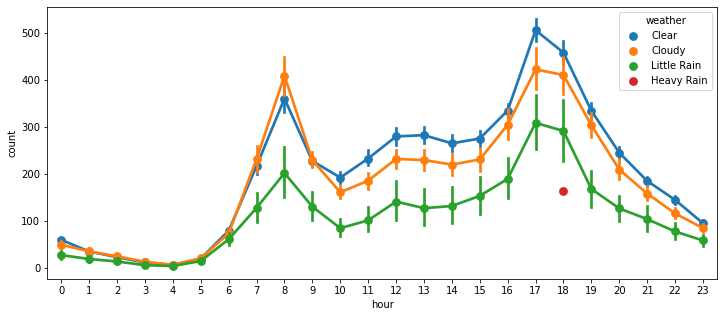

In [428]:
plt.figure(figsize=(12,5))
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["weather"],
              ci=95)

    
    
    H0: population mean of number of cycles rented in different seaons are same
    Ha: population mean of number of cycles rented in different seaons are different
    
    

In [429]:
Clear = data.loc[data["weather"]=="Clear"]["count"]
Cloudy = data.loc[data["weather"]=="Cloudy"]["count"]
Little_Rain = data.loc[data["weather"]=="Little Rain"]["count"]
Heavy_Rain = data.loc[data["weather"]=="Heavy Rain"]["count"]

In [430]:
len(Clear),len(Cloudy),len(Little_Rain),len(Heavy_Rain)

(7192, 2834, 859, 1)

<AxesSubplot:xlabel='count', ylabel='Density'>

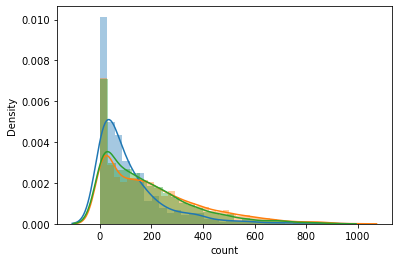

In [432]:
sns.distplot((Little_Rain))
sns.distplot((Clear))
sns.distplot((Cloudy))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Density'>

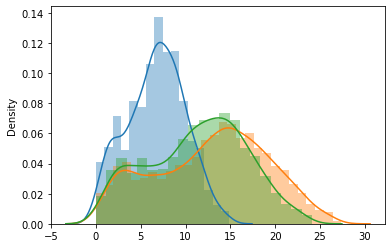

In [431]:
sns.distplot(stats.boxcox(Little_Rain)[0])
sns.distplot(stats.boxcox(Clear)[0])
sns.distplot(stats.boxcox(Cloudy)[0])

<IPython.core.display.Javascript object>

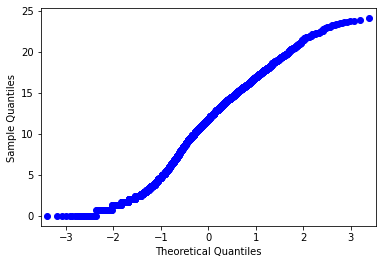

In [438]:
sm.qqplot((stats.boxcox(Cloudy)[0]))
plt.show()

In [437]:
# testing for normality : 

In [434]:
stats.anderson(Clear,dist="norm")

<IPython.core.display.Javascript object>

AndersonResult(statistic=209.40911708071326, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [439]:
# Since the datasets for tests, are not normally distributed, and having significance varinace between weathers , 

# we cannot perform anova test .

# we can use non parametric test : Kruskal Wallis test : 

In [520]:
data["weather"].unique()

array(['Clear', 'Cloudy', 'Little Rain', 'Heavy Rain'], dtype=object)

In [521]:
data["weather"].value_counts()

Clear          7192
Cloudy         2834
Little Rain     859
Heavy Rain        1
Name: weather, dtype: int64

In [522]:
kr  = data[["weather","count"]]

In [523]:
kr = kr[kr["weather"].isin(['Clear', 'Cloudy', 'Little Rain'])]

In [524]:
# kr = kr.sort_values(by="count")

In [525]:
# kr["rank"] = np.arange(1,len(kr)+1)

Df(rank) = df(count).rank(ascending=false)

In [526]:
kr["rank"] = kr["count"].rank()

In [527]:
rank_sum = kr.groupby("weather")["rank"].sum()
rank_sum = rank_sum.astype("int64")
rank_sum


weather
Clear          40752899
Cloudy         14990213
Little Rain     3503943
Name: rank, dtype: int64

In [528]:
N = len(kr)
N


10885

In [529]:
degree_of_freedom = kr["weather"].nunique()-1
degree_of_freedom


2

In [530]:
((12/(N*(N+1)))*(np.sum(((rank_sum**2)/(kr.groupby("weather")["rank"].count())))))-(3*(N+1))

204.95101790400076

In [531]:
1-stats.chi2.cdf(205.073,degree_of_freedom)

<IPython.core.display.Javascript object>

0.0

In [532]:
stats.chi2.ppf(0.95,2)

<IPython.core.display.Javascript object>

5.991464547107979

In [533]:
Clear = data.loc[data["weather"]=="Clear"]["count"]
Cloudy = data.loc[data["weather"]=="Cloudy"]["count"]
Little_Rain = data.loc[data["weather"]=="Little Rain"]["count"]

In [534]:
stats.kruskal(Clear,Cloudy,Little_Rain)

<IPython.core.display.Javascript object>

KruskalResult(statistic=204.95566833068537, pvalue=3.122066178659941e-45)

# # If No. of cycles rented is similar or different in different seasons

In [125]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'day', 'date', 'hour', 'Month', 'Month_name', 'temperature',
       'gethumidity', 'windspeed_category'],
      dtype='object')

In [126]:
data["season"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

<AxesSubplot:xlabel='hour', ylabel='count'>

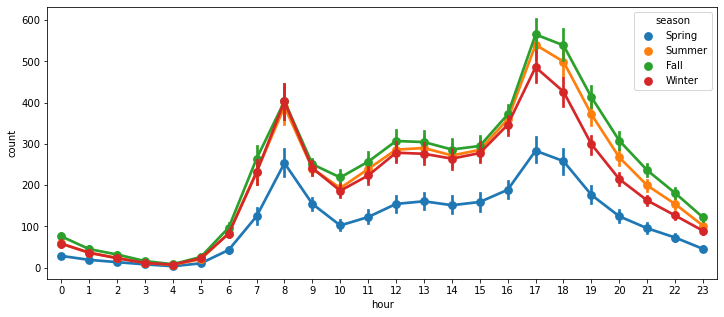

In [127]:
plt.figure(figsize=(12,5))
sns.pointplot(x = data["hour"],
              y= data["count"],
              hue=data["season"],
              ci=95)

In [128]:
Spring = data.loc[data["season"]=="Spring"]["count"]
Summer = data.loc[data["season"]=="Summer"]["count"]
Fall = data.loc[data["season"]=="Fall"]["count"]
Winter = data.loc[data["season"]=="Winter"]["count"]

In [129]:
len(Spring),len(Summer),len(Fall),len(Winter)

(2686, 2733, 2733, 2734)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Density'>

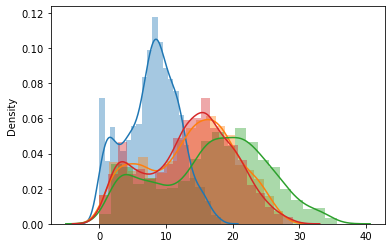

In [130]:
sns.distplot(stats.boxcox(Spring)[0])
sns.distplot(stats.boxcox(Summer)[0])
sns.distplot(stats.boxcox(Fall)[0])
sns.distplot(stats.boxcox(Winter)[0])

<IPython.core.display.Javascript object>

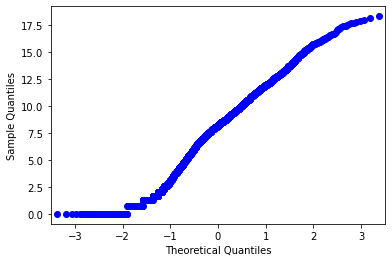

In [131]:
sm.qqplot((stats.boxcox(Spring)[0]))
plt.show()

In [539]:
kr  = data[["season","count"]]
kr["rank"] = kr["count"].rank()
rank_sum = kr.groupby("season")["rank"].sum()
rank_sum = rank_sum.astype("int64")
N = len(kr)
degree_of_freedom = kr["season"].nunique()-1
H = ((12/(N*(N+1)))*(np.sum(((rank_sum**2)/(kr.groupby("season")["rank"].count())))))-(3*(N+1))
H

699.6499424783542

In [536]:
1-stats.chi2.cdf(205.073,degree_of_freedom)


<IPython.core.display.Javascript object>

0.0

In [537]:
stats.chi2.ppf(0.95,degree_of_freedom)


<IPython.core.display.Javascript object>

7.814727903251179

In [538]:
Spring = data.loc[data["season"]=="Spring"]["count"]
Summer = data.loc[data["season"]=="Summer"]["count"]
Fall = data.loc[data["season"]=="Fall"]["count"]
Winter = data.loc[data["season"]=="Winter"]["count"]

stats.kruskal(Spring,Summer,Fall,Winter)

<IPython.core.display.Javascript object>

KruskalResult(statistic=699.6668548181988, pvalue=2.479008372608633e-151)